# Prebiotic Molecule Accumulation Model 

## Model Overview

This notebook implements a simple time-dependent box model to explore how prebiotic organic molecules might accumulate in a small surface environment (such as a pond) on the early Earth. The idea is to treat the pond as an **open system**, where organic molecules are continuously added, destroyed, and lost over time.

Rather than tracking every chemical reaction in detail, the model focuses on the overall balance of organic material. At each moment in time, the amount of material present depends on:
* how fast new molecules are produced,
* how fast they are destroyed, and
* how fast they are removed from the system.

This changing balance is described mathematically using a **first-order ordinary differential equation (ODE)**, and solved via **numerical integration**. The result is a time-evolving simulation that shows how organic molecules can build up—or fail to build up—under different conditions on the early Earth.

## Model Assumptions.

To keep this first computational model simple and understandable, several assumptions are made. These assumptions define what the model includes and, just as importantly, what it leaves out.

1. **Single, well-mixed environment**: The system is treated as one small, well-mixed environment i.e., prebiotic molecules are assumed to be evenly distributed throughout the system at all times, with no spatial variations in concentration.
2. **Constant average production rate**: Prebiotic organic molecules are produced at a constant average rate. This represents ongoing abiotic synthesis on the early Earth, without modeling individual chemical reactions or short-term fluctuations.
3. **Concentration-dependent destruction and loss**: Processes such as UV radiation, hydrolysis, and physical loss (for example, seepage or washout) are assumed to increase in proportion to the amount of organic material present. In other words, the more molecules there are, the more can be destroyed or lost.
4. **Periodic external input**: External influences, such as rainfall-driven delivery or environmental cycling, are represented using a smooth, periodic function rather than sudden, random events.
5. **Abstract representation of organic molecules**: The model does not track specific chemical species. Instead, it represents a generic concentration of prebiotic organic material, allowing the focus to remain on accumulation dynamics rather than detailed chemistry.

## Mathematical Formulation


* Let **C(t)** represent the concentration of prebiotic molecules at time **t**

The rate of change of C(t) is given by:

**dC/dt = P − D·C − L·C + R(t)**


 - The equation represents a balance between processes that *increase* molecular concentration and processes that *decrease* it

## Parameter Definitions.


The parameters used in the model are defined as follows:

- **C(t)**: Concentration of prebiotic organic molecules at time t.

- **P**: Production rate of prebiotic molecules- continuous synthesis processes occurring in the environment.

- **D**: Destruction rate constant- molecular breakdown due to environmental factors such as UV radiation or thermal instability.

- **L**: Loss rate constant- physical removal processes such as dilution, seepage, or degradation not explicitly modeled.

- **R(t)**: Time-dependent external input- episodic environmental contributions 

## Numerical Integration

The equation is solved using the `solve_ivp` function from the SciPy library. 

In [14]:
# import necessary libraries

import numpy as np          # for numerical computation
from scipy.integrate import solve_ivp  # to solve differential equations
import matplotlib.pyplot as plt           # to plot the results

In [15]:
# the model function - 
def prebiotic_model(t, C, P, D, L, R0, T):
    """
    Calculates how the concentration of prebiotic molecules changes with time.
    """
    # calculates for periodic external input 
    R = R0 * np.sin(2 * np.pi * t / T)**2  
     # rate of change of concentration
    dCdt = P - D * C - L * C + R
    return dCdt

# i.e., given the current time and concentration C, compute dC/dt

In [82]:
# define simulation time (start and end)
t_start = 0       # starting time
t_end = 100       # ending time (arbitrary, just long enough to see changes)

# initial concentration
C0 = [0.0]        # start with zero molecules

In [84]:
# define parameter values for the model (exploratory/illustrative)
P  = 0.5    # production rate of prebiotic molecules
D  = 0.02   # rate at which molecules are destroyed
L  = 0.01   # rate at which molecules are lost from the system
R0 = 1.0    # maximum environmental input (e.g., rainfall)
T  = 10     # period of environmental cycles (time between peaks)

In [18]:
# solving the equation over time

solution = solve_ivp(
    prebiotic_model,
    (t_start, t_end),
    C0,
    args=(P, D, L, R0, T),   # feed in the parameters
    dense_output=True       # allows smooth output for plotting
)

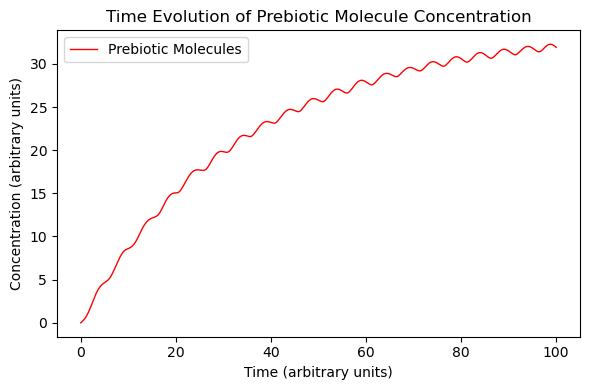

In [100]:
# plot

t = np.linspace(t_start, t_end, 500)       # generate smooth time points for plotting
C = solution.sol(t)[0]                   # get concentrations at each time point

plt.figure(figsize=( 6,4))
plt.plot(t, C, color='red', linewidth=1, linestyle='-', label='Prebiotic Molecules')
plt.xlabel("Time (arbitrary units)", fontsize=10)
plt.ylabel("Concentration (arbitrary units)", fontsize=10)
plt.title("Time Evolution of Prebiotic Molecule Concentration", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

The plot shows that the concentration of prebiotic molecules starts at zero and gradually increases. It goes up and down in a repeating pattern (waves) because of periodic environmental input, like rainfall cycles. After some time, the system reaches a roughly stable state where production, loss, and destruction are balanced.


## Sensitivity Analysis


### 1. Periodic input (R₀) 
to see how the system responds to different strengths of periodic environmental input (like rainfall) while keeping all other parameters fixed. This is to show how important environmental cycles are for molecule accumulation.

In [104]:
# test sensitivity to different strengths of environmental input (R0) 
R0_value = [0.2, 0.6, 1.0, 1.5]     # different rainfall/input levels


def run_model(R0_value):
    """
    Runs the model for each R₀ value, 
    and calculates how molecule concentrations change over time.
   
    """ 
    # solve the differential equation with the specified R0
    solution = solve_ivp(
        prebiotic_model,
        (t_start, t_end),
        C0,
        args=(P, D, L, R0_value, T),   
        dense_output=True
    )
    t = np.linspace(t_start, t_end, 500)
    C = solution.sol(t)[0]
    return t, C

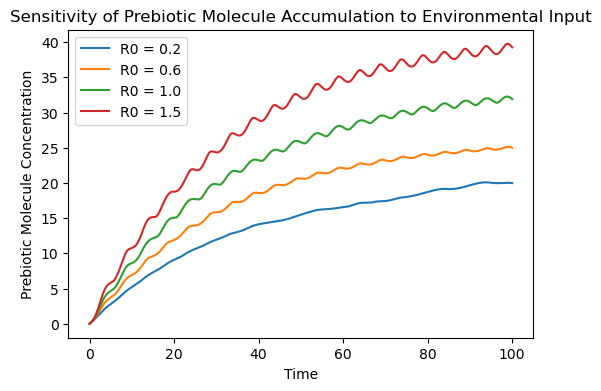

In [106]:
#plot

plt.figure(figsize=(6,4))

# loop through R0 values and plot each
for R0_val in R0_value:
    t, C = run_model(R0_val)
    plt.plot(t,C, label=f"R0 = {R0_val}")

plt.xlabel("Time",  fontsize=10)
plt.ylabel("Prebiotic Molecule Concentration",  fontsize=10)
plt.title("Sensitivity of Prebiotic Molecule Accumulation to Environmental Input", fontsize=12)
plt.legend()
plt.show()

Increasing R₀ leads to higher average concentrations and more pronounced temporal fluctuations. this indicates that episodic environmental input plays a significant role in regulating prebiotic molecule availability in the model.

### 2. Sensitivity to Destruction Rate (D)

In [64]:
D_values = [0.005, 0.02, 0.05]

def run_model_D(D_value):
    solution = solve_ivp(
        prebiotic_model,
        (t_start, t_end),
        C0,
        args=(P, D_value, L, R0, T),
        dense_output=True
    )
    t = np.linspace(t_start, t_end, 500)
    C = solution.sol(t)[0]
    return t, C

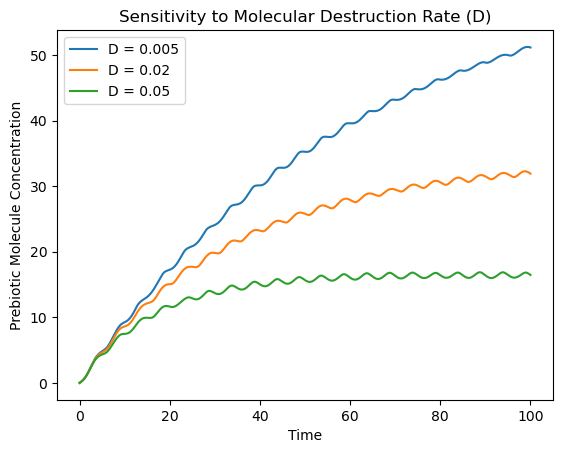

In [66]:
plt.figure()

for D_val in D_values:
    t, C = run_model_D(D_val)
    plt.plot(t, C, label=f"D = {D_val}")

plt.xlabel("Time")
plt.ylabel("Prebiotic Molecule Concentration")
plt.title("Sensitivity to Molecular Destruction Rate (D)")
plt.legend()
plt.show()


Increasing the molecular destruction rate leads to a significant reduction in overall prebiotic molecule concentration, indicating that chemical stability strongly constrains accumulation even under favorable environmental input.

### 3. Sensitivity to Loss Rate (L)

In [70]:
L_values = [0.005, 0.02, 0.05]

def run_model_L(L_value):
    solution = solve_ivp(
        prebiotic_model,
        (t_start, t_end),
        C0,
        args=(P, D, L_value, R0, T),
        dense_output=True
    )
    t = np.linspace(t_start, t_end, 500)
    C = solution.sol(t)[0]
    return t, C

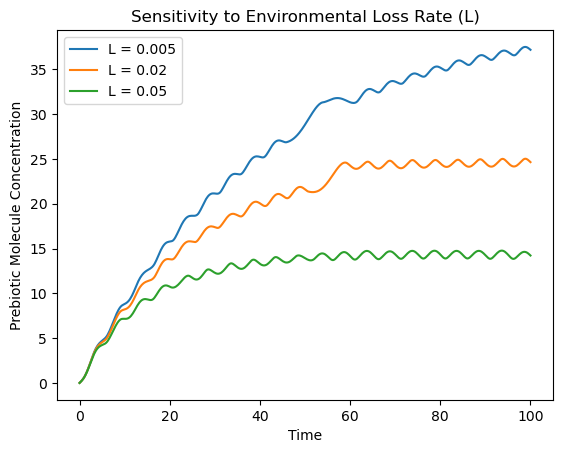

In [72]:
plt.figure()

for L_val in L_values:
    t, C = run_model_L(L_val)
    plt.plot(t, C, label=f"L = {L_val}")

plt.xlabel("Time")
plt.ylabel("Prebiotic Molecule Concentration")
plt.title("Sensitivity to Environmental Loss Rate (L)")
plt.legend()
plt.show()


Increasing the environmental loss rate reduces molecular concentration, but the system remains responsive to periodic input, suggesting that replenishment mechanisms may partially offset physical removal processes.

## Results


## Discussion